## RESNET TRAINING IN TENSORFLOW KERAS

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np
import datetime as dt

In [3]:
TRAIN_MODEL = 'RESNET'

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('Train dataset contains {} images and each image of shape {}x{} pixels and {} channels'.
      format(x_train.shape[0], x_train.shape[1], x_train.shape[2], x_train.shape[3]))

Train dataset contains 50000 images and each image of shape 32x32 pixels and 3 channels


In [4]:
# Training data
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64).shuffle(10000)
print('Given shape:', train_dataset)
train_dataset = train_dataset.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))
train_dataset = train_dataset.map(lambda x, y: (tf.image.central_crop(x,0.75), y))
print('Extracted only central image:', train_dataset)
train_dataset = train_dataset.map(lambda x, y: (tf.image.random_flip_left_right(x), y))
train_dataset = train_dataset.repeat()


Given shape: <ShuffleDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.uint8, tf.uint8)>
Extracted only central image: <MapDataset shapes: ((None, 24, 24, 3), (None, 1)), types: (tf.float32, tf.uint8)>


In [5]:
# Validation data
valid_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(5000).shuffle(1000)
valid_dataset = valid_dataset.map(lambda x, y: (tf.cast(x, tf.float32)/255.0, y))
valid_dataset = valid_dataset.map(lambda x, y: (tf.image.central_crop(x, 0.75), y))
valid_dataset = valid_dataset.repeat()
print('Generated validation dataset', valid_dataset)

Generated validation dataset <RepeatDataset shapes: ((None, 24, 24, 3), (None, 1)), types: (tf.float32, tf.uint8)>


In [8]:
def res_net_block(input_data, filters, conv_size):
    x = layers.Conv2D(filters, conv_size, activation='relu', padding='same')(input_data)
    x = layers.BatchNormalization()(x)
    x = layers. Conv2D(filters, conv_size, activation=None, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, input_data])
    x = layers.Activation('relu')(x)
    return x
    

In [10]:
def non_res_net_block(input_data, filters, conv_size):
    x = layers.Conv2D(filters, conv_size, activation='relu', padding='same')(input_data)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, conv_size, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    return x

In [9]:
inputs = keras.Input(shape=(24, 24, 3))
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)

if TRAIN_MODEL = 'RESNET':
    num_res_net_blocks = 10
    for i in range(num_res_net_blocks):
        x = res_net_block(x, 64, 3)
else:
    x = non_res_net_block(x, 64, 3)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

res_net_model = keras.Model(inputs, outputs)
    


In [13]:
callbacks = [keras.callbacks.TensorBoard(log_dir='./log/{}'.format(dt.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')), write_images=True)]
res_net_model.compile(optimizer=keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',
                     metrics=['acc'])
history = res_net_model.fit(train_dataset, epochs=30, steps_per_epoch=195, validation_data=valid_dataset, validation_steps=3, callbacks=callbacks)

Train for 195 steps, validate for 3 steps
Epoch 1/30
195/195 [==============================] - 42s 214ms/step - loss: 0.7292 - acc: 0.7502 - val_loss: 0.9266 - val_acc: 0.6880
Epoch 2/30
195/195 [==============================] - 34s 176ms/step - loss: 0.7328 - acc: 0.7526 - val_loss: 0.9941 - val_acc: 0.6637
Epoch 3/30
195/195 [==============================] - 32s 162ms/step - loss: 0.7328 - acc: 0.7472 - val_loss: 0.9479 - val_acc: 0.6881
Epoch 4/30
195/195 [==============================] - 33s 169ms/step - loss: 0.7266 - acc: 0.7576 - val_loss: 0.9883 - val_acc: 0.6757
Epoch 5/30
195/195 [==============================] - 33s 167ms/step - loss: 0.6848 - acc: 0.7633 - val_loss: 0.8383 - val_acc: 0.7118
Epoch 6/30
195/195 [==============================] - 33s 169ms/step - loss: 0.6873 - acc: 0.7610 - val_loss: 0.9099 - val_acc: 0.6883
Epoch 7/30
195/195 [==============================] - 33s 172ms/step - loss: 0.6848 - acc: 0.7679 - val_loss: 0.8764 - val_acc: 0.7074
Epoch 8/30
19

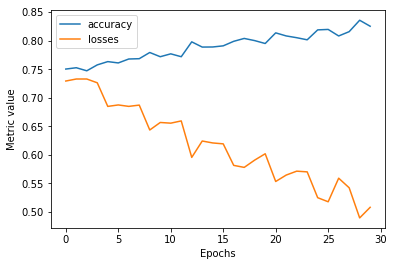

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['loss'], label='losses')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Metric value')
plt.show()

Terminal:

tensorboard --logdir ./log/

Browser:

http://localhost:6006/

References:
    
1. https://adventuresinmachinelearning.com/introduction-resnet-tensorflow-2/
2. https://medium.com/@mannasiladittya/building-inception-resnet-v2-in-keras-from-scratch-a3546c4d93f0